<a href="https://colab.research.google.com/github/RayKwon2040/Loan_default_rate_project/blob/main/Loan_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Default Prediction**

## **Introduction**

Anonymized Loan Default data includes 37 variables such as loan amount, term, interest rate, installment, employment length, home ownership, annual income, loan status, and purpose, among others.

Loan default is a critical problem because it causes direct financial losses for lenders, as well as liquidity issues and operational disruptions. Therefore, predictive models must be developed to help prevent these issues.


Table of Contents



1.   EDA and Data Cleaning
2.   Feature Engineering
3.   Model Developmnet


    *   Logistics Regression
    *   Random Forest
    *   SVM
    *   K_Nearest_Neighbor
    *   Gradient Boosting
    *   XGBoost

4.   Feature Importance
5.   Conclusion



In [ ]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/Anonymize_Loan_Default_data.csv', encoding='latin1')
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
0,2,2,2,0.0,0.0,0.00000,36 months,0.00,0.00,< 1 year,...,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,Jan-07,1
1,3,545583,703644,2500.0,2500.0,2500.00000,36 months,13.98,85.42,4 years,...,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Aug-13,Jun-16,0
2,4,532101,687836,5000.0,5000.0,5000.00000,36 months,15.95,175.67,4 years,...,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,NaN,Mar-12,1
3,5,877788,1092507,7000.0,7000.0,7000.00000,36 months,9.91,225.58,10+ years,...,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,NaN,Mar-14,0
4,6,875406,1089981,2000.0,2000.0,2000.00000,36 months,5.42,60.32,10+ years,...,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,NaN,Jun-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38475,38476,849205,1060907,3000.0,3000.0,3000.00000,36 months,11.99,99.63,3 years,...,22.0,3586.619764,3586.62,3000.00,586.62,Aug-14,100.30,NaN,Jun-16,0
38476,38477,852914,1065048,10400.0,10400.0,10400.00000,36 months,13.49,352.88,9 years,...,33.0,12703.534030,12703.53,10400.00,2303.53,Sep-14,393.08,NaN,Jun-16,0
38477,38478,519553,671637,16000.0,10550.0,10531.35818,60 months,14.96,250.77,10+ years,...,25.0,14202.267530,14163.31,10550.00,3652.27,Jun-13,5439.96,NaN,Feb-16,0
38478,38479,825638,1034448,10000.0,10000.0,10000.00000,36 months,16.89,355.99,1 year,...,12.0,12815.178320,12815.18,10000.00,2815.18,Aug-14,380.63,NaN,Sep-15,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38480 entries, 0 to 38479
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              38480 non-null  int64  
 1   id                      38480 non-null  int64  
 2   member_id               38480 non-null  int64  
 3   loan_amnt               38479 non-null  float64
 4   funded_amnt             38479 non-null  float64
 5   funded_amnt_inv         38479 non-null  float64
 6   term                    38480 non-null  object 
 7   int_rate                38480 non-null  float64
 8   installment             38479 non-null  float64
 9   emp_length              37487 non-null  object 
 10  home_ownership          38480 non-null  object 
 11  annual_inc              38478 non-null  float64
 12  verification_status     38480 non-null  object 
 13  issue_d                 38480 non-null  object 
 14  loan_status             38480 non-null

In [ ]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail
count,38480.000000,3.848000e+04,3.848000e+04,38479.000000,38479.000000,38479.000000,38480.00000,38479.000000,3.847800e+04,38480.000000,...,38479.000000,38479.000000,3.847600e+04,38479.000000,38479.000000,38479.000000,38479.000000,38479.000000,38479.000000,38480.000000
mean,19240.500000,6.649979e+05,8.261899e+05,11094.727644,10831.856337,10150.141518,12.16430,323.163255,6.899531e+04,13.378119,...,9.342966,0.057902,1.428987e+04,22.108501,11980.696892,11274.519569,9646.412705,2232.768235,2614.441757,0.151481
std,11108.363516,2.192322e+05,2.793531e+05,7405.416042,7146.853682,7128.026828,3.73744,209.089097,6.447639e+04,6.744356,...,4.498075,0.245707,2.194138e+04,11.588602,9006.505205,8946.229941,7051.828302,2570.177312,4391.969583,0.358522
min,1.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9620.750000,4.983645e+05,6.384620e+05,5200.000000,5100.000000,4950.000000,9.62000,165.740000,4.000000e+04,8.200000,...,6.000000,0.000000,3.639750e+03,13.000000,5463.099238,4811.735000,4400.000000,657.700000,212.010000,0.000000
50%,19240.500000,6.443195e+05,8.242545e+05,9750.000000,9600.000000,8495.792749,11.99000,277.980000,5.865000e+04,13.485000,...,9.000000,0.000000,8.839500e+03,20.000000,9673.221341,8953.240000,8000.000000,1335.090000,526.000000,0.000000
75%,28860.250000,8.265608e+05,1.034706e+06,15000.000000,15000.000000,14000.000000,14.72000,429.350000,8.200000e+04,18.690000,...,12.000000,0.000000,1.726550e+04,29.000000,16402.394995,15486.925000,13315.100000,2795.020000,3169.815000,0.000000
max,38480.000000,1.077430e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,100.99000,1305.190000,6.000000e+06,100.000000,...,47.000000,5.000000,1.207359e+06,90.000000,58563.679930,58563.680000,35000.020000,23611.100000,36115.200000,1.000000


In [ ]:
# Check Null

df.isnull().sum()

,0
Unnamed: 0,0
id,0
member_id,0
loan_amnt,1
funded_amnt,1
funded_amnt_inv,1
term,0
int_rate,0
installment,1
emp_length,993


In [ ]:
#Drop columns

df1 = df.drop(['next_pymnt_d', 'mths_since_last_delinq'], axis=1)
df1

#Drop columns that include missing values more than half

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,...,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,repay_fail
0,2,2,2,0.0,0.0,0.00000,36 months,0.00,0.00,< 1 year,...,0.00%,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,1
1,3,545583,703644,2500.0,2500.0,2500.00000,36 months,13.98,85.42,4 years,...,21.30%,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Jun-16,0
2,4,532101,687836,5000.0,5000.0,5000.00000,36 months,15.95,175.67,4 years,...,99.90%,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,Mar-12,1
3,5,877788,1092507,7000.0,7000.0,7000.00000,36 months,9.91,225.58,10+ years,...,47.20%,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,Mar-14,0
4,6,875406,1089981,2000.0,2000.0,2000.00000,36 months,5.42,60.32,10+ years,...,0%,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,Jun-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38475,38476,849205,1060907,3000.0,3000.0,3000.00000,36 months,11.99,99.63,3 years,...,73.50%,22.0,3586.619764,3586.62,3000.00,586.62,Aug-14,100.30,Jun-16,0
38476,38477,852914,1065048,10400.0,10400.0,10400.00000,36 months,13.49,352.88,9 years,...,39.70%,33.0,12703.534030,12703.53,10400.00,2303.53,Sep-14,393.08,Jun-16,0
38477,38478,519553,671637,16000.0,10550.0,10531.35818,60 months,14.96,250.77,10+ years,...,62.20%,25.0,14202.267530,14163.31,10550.00,3652.27,Jun-13,5439.96,Feb-16,0
38478,38479,825638,1034448,10000.0,10000.0,10000.00000,36 months,16.89,355.99,1 year,...,53.30%,12.0,12815.178320,12815.18,10000.00,2815.18,Aug-14,380.63,Sep-15,0


In [ ]:
#Drop columns 2

df2 = df1.drop(['Unnamed: 0', 'member_id','id','zip_code','loan_status'], axis=1)
df2

#Drop columns that include reference ID

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,repay_fail
0,0.0,0.0,0.00000,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,...,0.00%,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,1
1,2500.0,2500.0,2500.00000,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,...,21.30%,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Jun-16,0
2,5000.0,5000.0,5000.00000,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,...,99.90%,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,Mar-12,1
3,7000.0,7000.0,7000.00000,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,...,47.20%,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,Mar-14,0
4,2000.0,2000.0,2000.00000,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,...,0%,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,Jun-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38475,3000.0,3000.0,3000.00000,36 months,11.99,99.63,3 years,RENT,74250.0,Verified,...,73.50%,22.0,3586.619764,3586.62,3000.00,586.62,Aug-14,100.30,Jun-16,0
38476,10400.0,10400.0,10400.00000,36 months,13.49,352.88,9 years,RENT,62000.0,Source Verified,...,39.70%,33.0,12703.534030,12703.53,10400.00,2303.53,Sep-14,393.08,Jun-16,0
38477,16000.0,10550.0,10531.35818,60 months,14.96,250.77,10+ years,MORTGAGE,95088.0,Source Verified,...,62.20%,25.0,14202.267530,14163.31,10550.00,3652.27,Jun-13,5439.96,Feb-16,0
38478,10000.0,10000.0,10000.00000,36 months,16.89,355.99,1 year,RENT,48720.0,Not Verified,...,53.30%,12.0,12815.178320,12815.18,10000.00,2815.18,Aug-14,380.63,Sep-15,0


In [ ]:
for i in df[['term','emp_length','revol_util']]:

  df2[i] = df2[i].str.extract('(\d+)').astype(float)




<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1365625964.py:3: SyntaxWarning: invalid escape sequence '\d'
  df2[i] = df2[i].str.extract('(\d+)').astype(float)


In [ ]:
df2

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,repay_fail
0,0.0,0.0,0.00000,36.0,0.00,0.00,1.0,RENT,0.0,Not Verified,...,0.0,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,1
1,2500.0,2500.0,2500.00000,36.0,13.98,85.42,4.0,RENT,20004.0,Not Verified,...,21.0,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Jun-16,0
2,5000.0,5000.0,5000.00000,36.0,15.95,175.67,4.0,RENT,59000.0,Not Verified,...,99.0,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,Mar-12,1
3,7000.0,7000.0,7000.00000,36.0,9.91,225.58,10.0,MORTGAGE,53796.0,Not Verified,...,47.0,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,Mar-14,0
4,2000.0,2000.0,2000.00000,36.0,5.42,60.32,10.0,RENT,30000.0,Not Verified,...,0.0,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,Jun-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38475,3000.0,3000.0,3000.00000,36.0,11.99,99.63,3.0,RENT,74250.0,Verified,...,73.0,22.0,3586.619764,3586.62,3000.00,586.62,Aug-14,100.30,Jun-16,0
38476,10400.0,10400.0,10400.00000,36.0,13.49,352.88,9.0,RENT,62000.0,Source Verified,...,39.0,33.0,12703.534030,12703.53,10400.00,2303.53,Sep-14,393.08,Jun-16,0
38477,16000.0,10550.0,10531.35818,60.0,14.96,250.77,10.0,MORTGAGE,95088.0,Source Verified,...,62.0,25.0,14202.267530,14163.31,10550.00,3652.27,Jun-13,5439.96,Feb-16,0
38478,10000.0,10000.0,10000.00000,36.0,16.89,355.99,1.0,RENT,48720.0,Not Verified,...,53.0,12.0,12815.178320,12815.18,10000.00,2815.18,Aug-14,380.63,Sep-15,0


In [ ]:
for i in df2[['issue_d', 'earliest_cr_line', 'last_pymnt_d','last_credit_pull_d']]:
  df2[i] = pd.to_datetime(df2[i], format='%b-%y')

  df2['month'+ '_'+i] = df2[i].dt.month
  df2['year'+ '_'+i] = df2[i].dt.year

  df2 = df2.drop(i, axis=1)

  df2

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38480 entries, 0 to 38479
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 38479 non-null  float64
 1   funded_amnt               38479 non-null  float64
 2   funded_amnt_inv           38479 non-null  float64
 3   term                      38480 non-null  float64
 4   int_rate                  38480 non-null  float64
 5   installment               38479 non-null  float64
 6   emp_length                37487 non-null  float64
 7   home_ownership            38480 non-null  object 
 8   annual_inc                38478 non-null  float64
 9   verification_status       38480 non-null  object 
 10  purpose                   38480 non-null  object 
 11  addr_state                38480 non-null  object 
 12  dti                       38480 non-null  float64
 13  delinq_2yrs               38479 non-null  float64
 14  inq_la

In [ ]:
#Check Duplicated data

df2.duplicated().sum()

np.int64(0)

In [ ]:
#remove null value
df2 = df2.dropna()

In [ ]:
df2.isnull().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
emp_length,0
home_ownership,0
annual_inc,0
verification_status,0


<Axes: title={'center': 'Number of default'}, xlabel='repay_fail'>

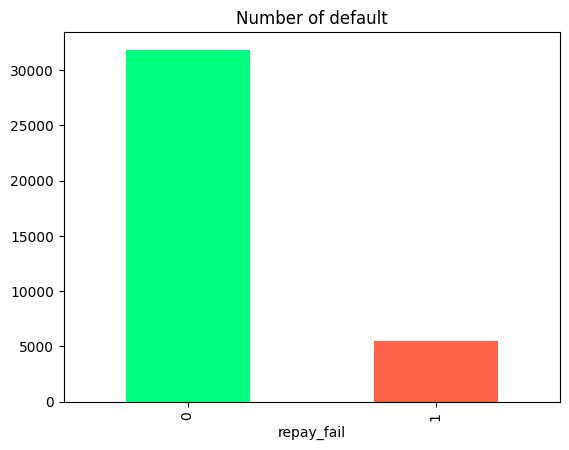

In [ ]:
#Visualzed target variables

import math

df2['repay_fail'].value_counts().plot(kind='bar', color=['springgreen', 'tomato'], title = 'Number of default')

In [ ]:
# Visualize categorical variables

def percentage_stacked_plot(column_to_plot, super_title):

  number_of_columns =2
  number_of_rows = math.ceil(len(column_to_plot)/2)

  fig = plt.figure(figsize=(17, 5*number_of_rows))
  fig.suptitle(super_title, fontsize=16)

  for i, column in enumerate(column_to_plot, 1):

    ax = fig.add_subplot(number_of_rows, number_of_columns, i)

    prop_by_independent = pd.crosstab(df2[column], df2['repay_fail']).apply(lambda x : x/x.sum())

    prop_by_independent.plot(kind='bar', ax=ax, stacked=True, rot=0, color=['cornflowerblue', 'lightcoral'])

    # set the legend in the upper right corner
    ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5), title='Default', fancybox=True)

    # set title and labels
    ax.set_title('Proportion of observations by ' + column, fontsize=12, loc='left')

    plt.xticks(fontsize=8, rotation=90)
    plt.subplots_adjust(hspace=0.8)





In [ ]:
categorical_variable = ['home_ownership',
 'verification_status', 'purpose','addr_state',
 'term' ]


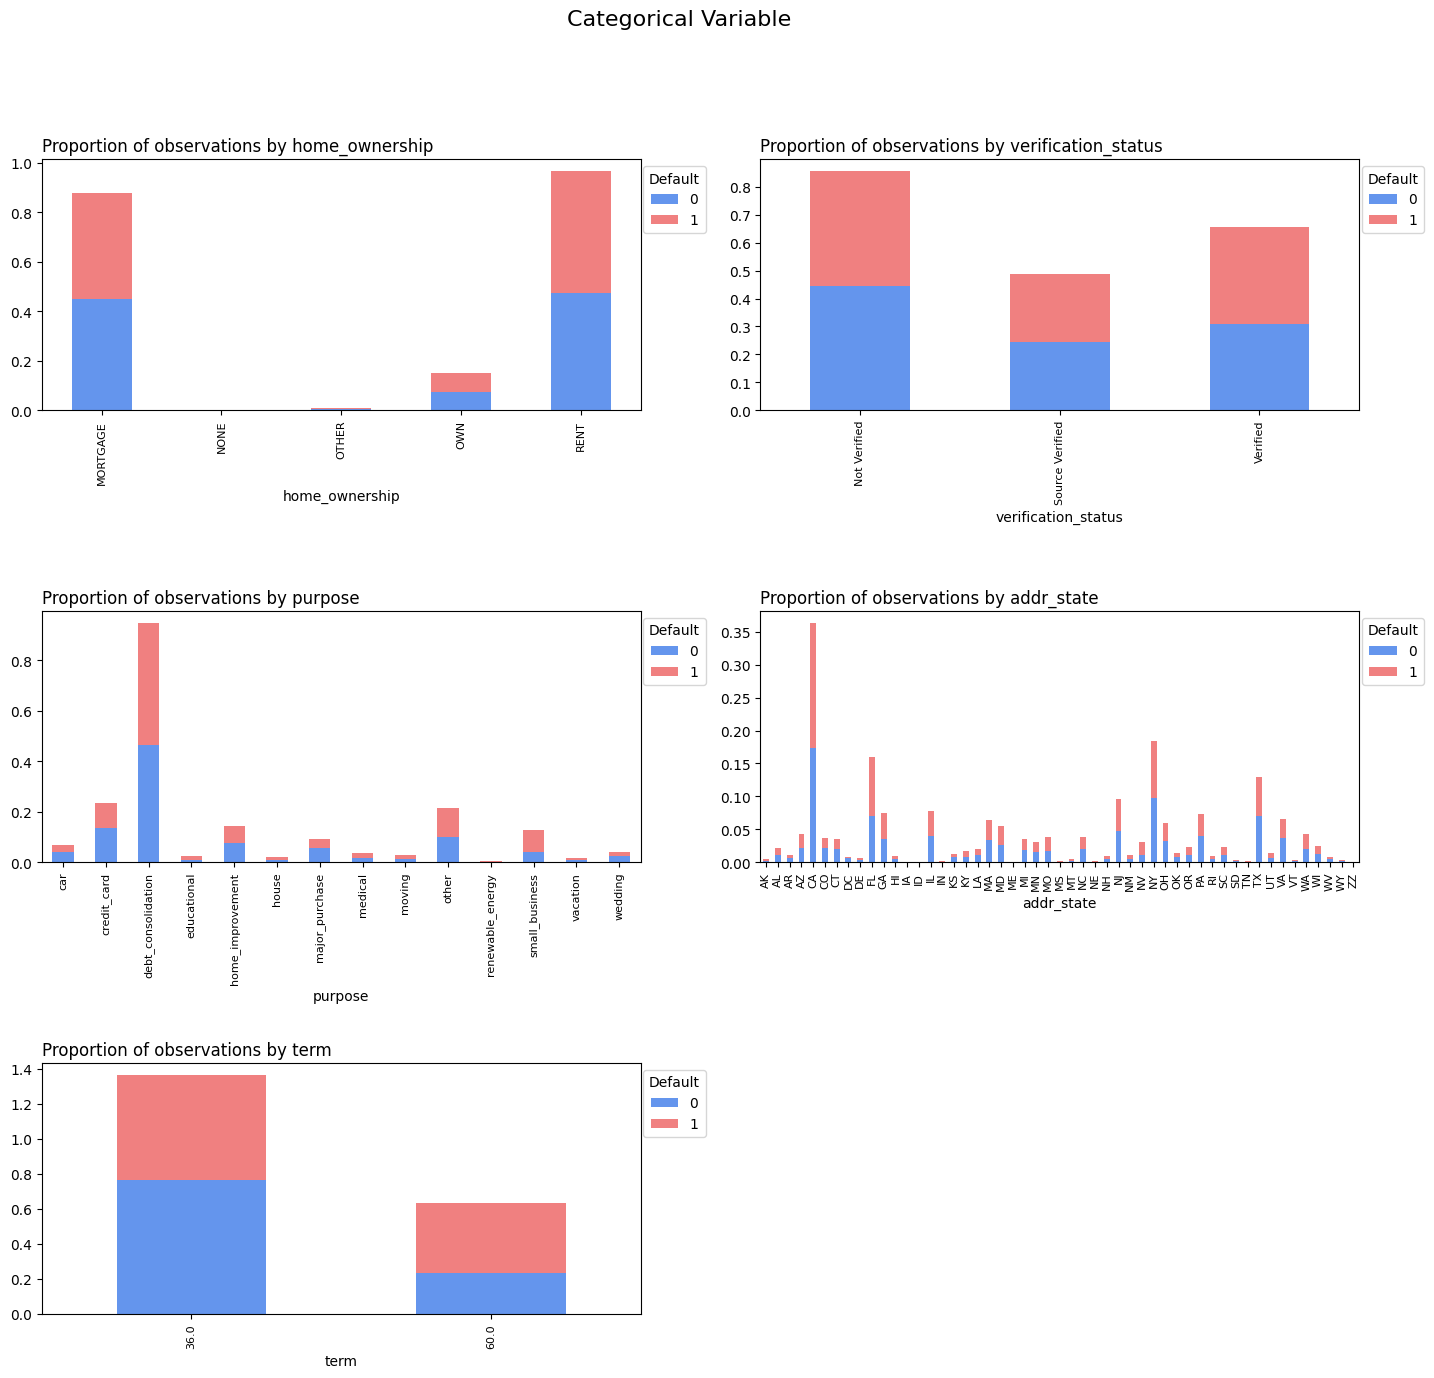

In [ ]:
percentage_stacked_plot(categorical_variable, 'Categorical Variable')

Key Findings



*   Most customers rent or own homes under a mortgage, and about half of them failed to repay their debt.
*   The main purpose of the loans is debt consolidation. As interest rates have increased, the likelihood of default has also risen.
*   Borrowers in California received the largest number of loans among all states, and roughly 50% of them — the highest rate — failed to repay.
*   Borrowers with short-term loans (36 months) are more likely to default due to higher interest rates compared to long-term loans and a tighter repayment schedule




In [ ]:
def histogram_plot(columns_to_plot, super_title):

  number_of_columns =2
  number_of_rows = math.ceil(len(columns_to_plot)/2)

  fig = plt.figure(figsize=(17, 5*number_of_rows))
  fig.suptitle(super_title, fontsize=16, y=0.98)

  for i, column in enumerate(columns_to_plot, 1):

    ax= fig.add_subplot(number_of_rows, number_of_columns, i)

    # Changed kind='kde' to kind='hist' to avoid LinAlgError with constant data
    df2[df2['repay_fail']==1][column].plot(kind='kde', ax=ax, color='lightcoral', label='Default')
    df2[df2['repay_fail']==0][column].plot(kind='kde', ax=ax, color='cornflowerblue', label='Non-default')

    # set the legend in the upper right corner
    ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5), title='Default', fancybox=True)

    # set title and labels
    ax.set_title('Distribution of ' + column + ' by Default', fontsize=12, loc='left')

     # Reduce top padding (fix big white space)
    fig.subplots_adjust(top=0.96)




In [ ]:
con = []


for i in df2.columns:
  if i not in categorical_variable:
    con.append(i)
print(con)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt', 'repay_fail', 'month_issue_d', 'year_issue_d', 'month_earliest_cr_line', 'year_earliest_cr_line', 'month_last_pymnt_d', 'year_last_pymnt_d', 'month_last_credit_pull_d', 'year_last_credit_pull_d']


In [ ]:
Continuous_variable = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt', 'month_issue_d', 'year_issue_d', 'month_earliest_cr_line', 'year_earliest_cr_line', 'month_last_pymnt_d', 'year_last_pymnt_d', 'month_last_credit_pull_d', 'year_last_credit_pull_d']

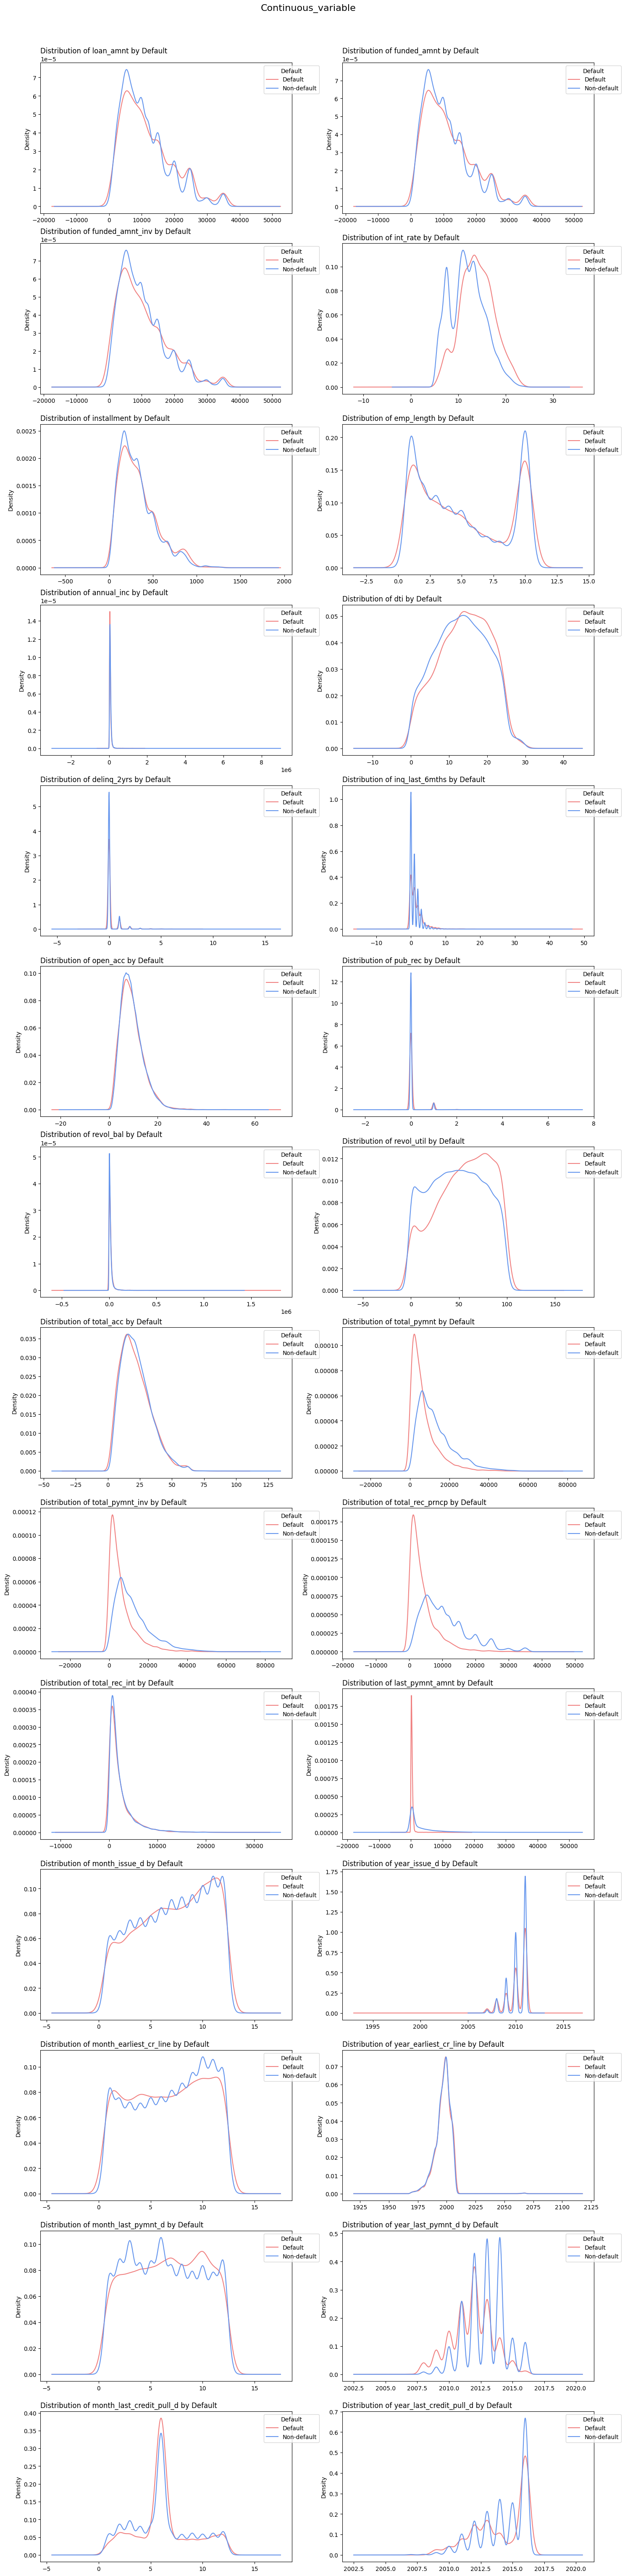

In [ ]:
histogram_plot(Continuous_variable, 'Continuous_variable')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37359 entries, 0 to 38479
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 37359 non-null  float64
 1   funded_amnt               37359 non-null  float64
 2   funded_amnt_inv           37359 non-null  float64
 3   term                      37359 non-null  float64
 4   int_rate                  37359 non-null  float64
 5   installment               37359 non-null  float64
 6   emp_length                37359 non-null  float64
 7   home_ownership            37359 non-null  object 
 8   annual_inc                37359 non-null  float64
 9   verification_status       37359 non-null  object 
 10  purpose                   37359 non-null  object 
 11  addr_state                37359 non-null  object 
 12  dti                       37359 non-null  float64
 13  delinq_2yrs               37359 non-null  float64
 14  inq_last_6m

In [ ]:
df2.select_dtypes(include='object').columns.tolist()

['home_ownership', 'verification_status', 'purpose', 'addr_state']

**When does default happen more frequently?**



*   When interest rates rise above 10%, more customers fail to repay compared to those who do not.
*   When the DTI (Debt-to-Income ratio) exceeds 13%, the default rate is higher than the non-default rate.
*   When the revolving credit line utilization exceeds 50%, the default rate surpasses the non-default rate.












## **Feature Engineering**

In [ ]:
#One-Hot encoding for object

one_hot_encoding_columns = ['home_ownership',
 'verification_status',
 'purpose']

df2_one_hot = pd.get_dummies(df2, columns = one_hot_encoding_columns)

In [ ]:
df2_one_hot

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,addr_state,dti,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0.0,0.0,0.00000,36.0,0.00,0.00,1.0,0.0,ZZ,0.00,...,False,False,True,False,False,False,False,False,False,False
1,2500.0,2500.0,2500.00000,36.0,13.98,85.42,4.0,20004.0,MI,19.86,...,False,False,False,False,False,True,False,False,False,False
2,5000.0,5000.0,5000.00000,36.0,15.95,175.67,4.0,59000.0,NY,19.57,...,False,False,False,False,False,False,False,False,False,False
3,7000.0,7000.0,7000.00000,36.0,9.91,225.58,10.0,53796.0,TX,10.80,...,False,False,False,False,False,True,False,False,False,False
4,2000.0,2000.0,2000.00000,36.0,5.42,60.32,10.0,30000.0,NY,3.60,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38475,3000.0,3000.0,3000.00000,36.0,11.99,99.63,3.0,74250.0,CO,22.17,...,False,False,False,False,False,False,False,False,False,False
38476,10400.0,10400.0,10400.00000,36.0,13.49,352.88,9.0,62000.0,OH,11.57,...,False,False,False,False,False,False,False,False,False,False
38477,16000.0,10550.0,10531.35818,60.0,14.96,250.77,10.0,95088.0,NJ,10.63,...,False,False,False,False,False,False,False,False,False,False
38478,10000.0,10000.0,10000.00000,36.0,16.89,355.99,1.0,48720.0,CT,18.97,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
#Target Encoding on States

def target_encode_train(X, y, col, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    encoded_col = pd.Series(index=X.index, dtype=float)
    #We must avoid that model indirectly “sees” the answer for test samples → leakage → unrealistically high performance

    for train_idx, valid_idx in kf.split(X):
        fold_mean = y.iloc[train_idx].groupby(X[col].iloc[train_idx]).mean()
        encoded_col.iloc[valid_idx] = X[col].iloc[valid_idx].map(fold_mean)
        #KFold makes sure training rows do not cheat by looking at their own target.

    global_mean = y.mean()
    encoded_col.fillna(global_mean, inplace=True)
    #Some states may appear only in the validation fold but not in the training folds.

    mapping = y.groupby(X[col]).mean()
    return encoded_col, mapping, global_mean


def target_encode_apply(X, col, mapping, global_mean):
    return X[col].map(mapping).fillna(global_mean)

In [ ]:
#Train/Test Split

X = df2_one_hot.drop('repay_fail', axis=1)
y = df2_one_hot['repay_fail']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train["state_te"], mapping, global_mean = target_encode_train(X_train, y_train, col="addr_state")
X_test["state_te"] = target_encode_apply(X_test, col="addr_state", mapping=mapping, global_mean=global_mean)

# Drop original categorical column
X_train = X_train.drop("addr_state", axis=1)
X_test = X_test.drop("addr_state", axis=1)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29887 entries, 24710 to 16297
Data columns (total 52 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            29887 non-null  float64
 1   funded_amnt                          29887 non-null  float64
 2   funded_amnt_inv                      29887 non-null  float64
 3   term                                 29887 non-null  float64
 4   int_rate                             29887 non-null  float64
 5   installment                          29887 non-null  float64
 6   emp_length                           29887 non-null  float64
 7   annual_inc                           29887 non-null  float64
 8   dti                                  29887 non-null  float64
 9   delinq_2yrs                          29887 non-null  float64
 10  inq_last_6mths                       29887 non-null  float64
 11  open_acc                     

In [ ]:
#Scaling (fit on Train only -- required since I use SMOTE)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train)

## **Model Development**

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def create_models(seed=2):

  models = []
  models.append(('K_nearest_neighbors', KNeighborsClassifier()))
  models.append(('Logistic_regression', LogisticRegression(random_state=seed)))
  models.append(('Support Vector Machine', SVC(random_state=seed)))
  models.append(('random_forest', RandomForestClassifier(random_state=seed)))
  models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))

  return models

models = create_models()


In [ ]:
results = []
names = []

for name, model in models:
  model.fit(X_train_sm, y_train_sm)
  predictions = model.predict(X_test_scaled)

  accuracy = accuracy_score(y_test, predictions)
  precision = precision_score(y_test, predictions)
  recall = recall_score(y_test, predictions)
  f1 = f1_score(y_test, predictions)

  results.append({
      'Model':name,
      'Accuracy':accuracy,
      'Precision': precision,
      'Recall': recall,
      'F1 Score':f1})

  #Convert results to a DataFrame
  results_df = pd.DataFrame(results)





In [ ]:
results_df.round(3)

,Model,Accuracy,Precision,Recall,F1 Score
0,K_nearest_neighbors,0.791,0.387,0.750,0.511
1,Logistic_regression,0.993,0.981,0.968,0.975
2,Support Vector Machine,0.982,0.977,0.896,0.935
3,random_forest,0.988,0.999,0.922,0.959
4,gradient_boosting,0.989,0.999,0.927,0.962


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

xgb_model = xgb.XGBClassifier()

grid_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=grid_params, cv=5, scoring='accuracy')

grid_search.fit(X_train_sm, y_train_sm)

print("Best Parameters:", grid_search.best_params_)

#Evaluation on test data
best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test_scaled)



Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}


In [ ]:
XGB_result = {'Model' : ['XGBoost'],
              'Accuracy': [accuracy_score(y_test, y_pred_xgb)],
              'Precision': [precision_score(y_test, y_pred_xgb)],
              'Recall': [recall_score(y_test, y_pred_xgb)],
              'F1 Score': [f1_score(y_test, y_pred_xgb)]}

XGB_result_df = pd.DataFrame(XGB_result)

result_final = pd.concat([results_df, XGB_result_df], ignore_index=True)

result_final.round(3)

,Model,Accuracy,Precision,Recall,F1 Score
0,K_nearest_neighbors,0.791,0.387,0.750,0.511
1,Logistic_regression,0.993,0.981,0.968,0.975
2,Support Vector Machine,0.982,0.977,0.896,0.935
3,random_forest,0.988,0.999,0.922,0.959
4,gradient_boosting,0.989,0.999,0.927,0.962
5,XGBoost,0.997,0.999,0.980,0.989


## **Feature Importance**



In [ ]:
#find average marginal contribution of a feature
import shap
explainer = shap.TreeExplainer(best_xgb_model)
shap_values = explainer.shap_values(X_test_scaled)

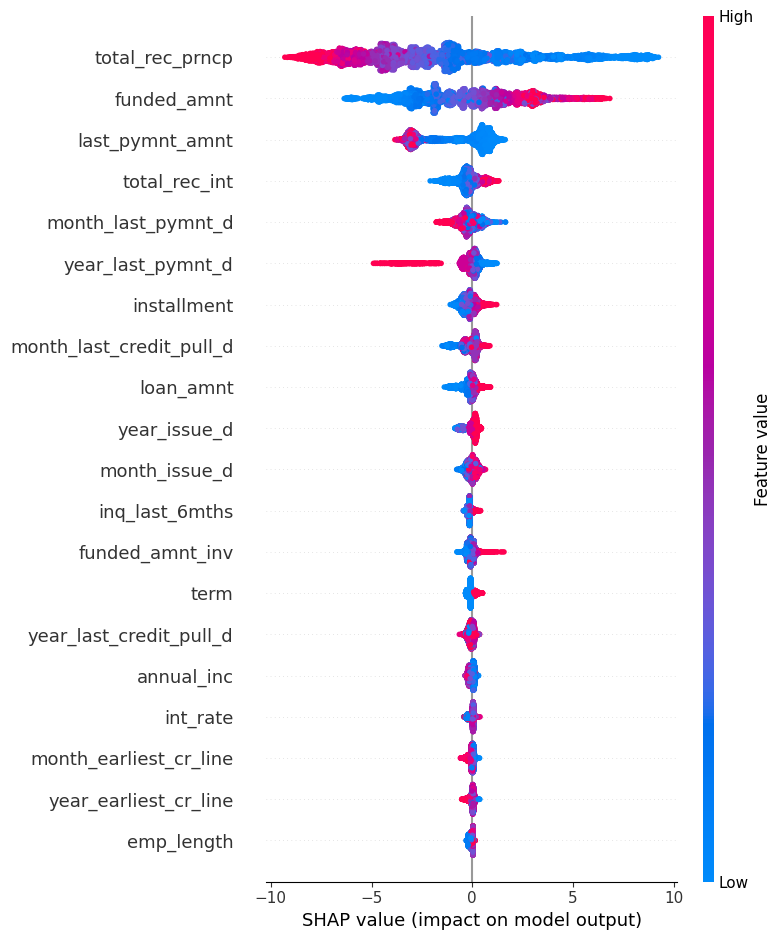

In [ ]:
feature_names = X_test.columns.tolist()
shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_names)

There are some important features that contribute most to default rate.



1.   total_rec_prncp (Principal received to date) : Borrowers who paid back more principal are less likely to default
2.   funded_amnt(The total amount committed by investors for that loan at that point in time): Larger loans increase the chance of default.
3.   last_pymnt_amnt (Last payment amount): A large most recent payment is a good sign
4.   total_rec_int (Total interest received): People who have paid more interest (consistent payments) are less risky.



In conclusion, six models were developed to predict the default rate.
When XGBoost model was fine-tuned with the best parameters ({'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}), it achieved the best performance across all four metrics — accuracy, precision, recall, and F1 score.

Feature engineering also helped XGBoost model in terms of SMOTE, target and one-hot encoding.

As a result, XGBoost model predicts defaul rate with nearly 99% accuracy, demonstrating a moderate trade-off between precision and recall.

